In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Outlier 처리

In [22]:
data = {'col1': [10, 12, 14, 16, 100, 12, 14, 16, 10, 20, 35, 22, 17, 33, 45, -1, 12]}
df = pd.DataFrame(data)

In [23]:
df

,col1
0,10
1,12
2,14
3,16
4,100
5,12
6,14
7,16
8,10
9,20


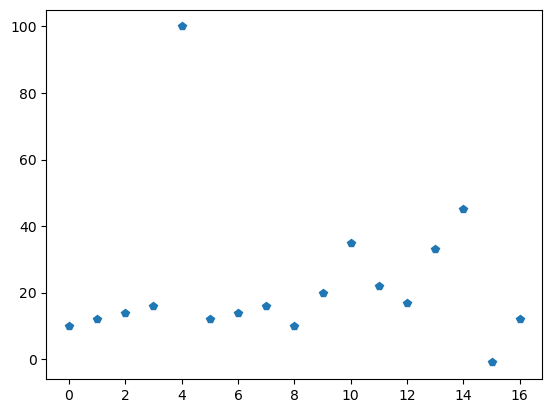

In [24]:
plt.plot(df["col1"], "p")

{'whiskers': [<matplotlib.lines.Line2D at 0x1d778c50190>,
 'caps': [<matplotlib.lines.Line2D at 0x1d778cd6ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d778cd4810>],
 'medians': [<matplotlib.lines.Line2D at 0x1d778ce0050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d778ce0a10>],
 'means': []}

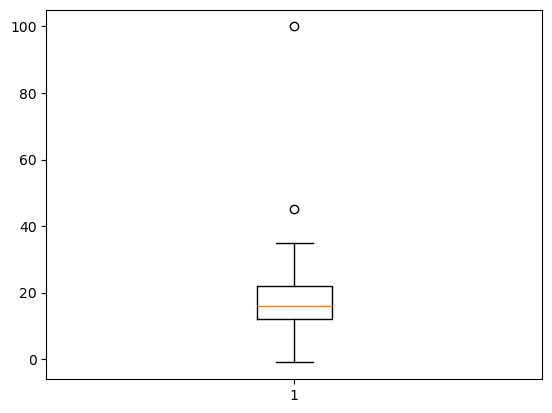

In [25]:
plt.boxplot(df["col1"])

### IQR * 1.5 


In [26]:

Q1 = df['col1'].quantile(1/4)
Q3 = df['col1'].quantile(3/4)

IQR = Q3 - Q1

In [27]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR 



In [28]:
df_filtered_index = (df['col1'] < upper_limit) & (df['col1'] > lower_limit)

In [29]:

df[df_filtered_index]

,col1
0,10
1,12
2,14
3,16
5,12
6,14
7,16
8,10
9,20
10,35


### z-score method

In [30]:
from scipy import stats

In [31]:
df['z_score'] = stats.zscore(df['col1'])

In [32]:
df

,col1,z_score
0,10,-0.579824
1,12,-0.488976
2,14,-0.398128
3,16,-0.307280
4,100,3.508338
5,12,-0.488976
6,14,-0.398128
7,16,-0.307280
8,10,-0.579824
9,20,-0.125584


In [34]:
df_filtered = df[abs(df['z_score']) < 3]
df_filtered

,col1,z_score
0,10,-0.579824
1,12,-0.488976
2,14,-0.398128
3,16,-0.307280
5,12,-0.488976
6,14,-0.398128
7,16,-0.307280
8,10,-0.579824
9,20,-0.125584
10,35,0.555776



### Percentile 기법

In [36]:
lower_bound = df['col1'].quantile(0.05)
upper_bound = df['col1'].quantile(0.95)

In [37]:
df_filtered = df[(df['col1'] >= lower_bound) & (df['col1'] <= upper_bound)]

In [38]:
df_filtered

,col1,z_score
0,10,-0.579824
1,12,-0.488976
2,14,-0.398128
3,16,-0.307280
5,12,-0.488976
6,14,-0.398128
7,16,-0.307280
8,10,-0.579824
9,20,-0.125584
10,35,0.555776


#### 여기까지는 값에 의한 이상치를 판단

하지만 이상치는 값이 아닌 관계에 의해서 발생하기도 함.


### LOF



In [41]:
from sklearn.neighbors import LocalOutlierFactor

In [97]:
data = {
    'height' : [170, 165, 180, 177, 167, 155, 158, 185, 170, 175, 
                177, 160, 155, 154, 149, 180, 185, 177],
    'weight' : [ 80, 60, 35, 60, 50,  40, 42, 82, 70, 68,
                74, 60, 49, 45, 44, 80, 75, 69]
}
df = pd.DataFrame(data)

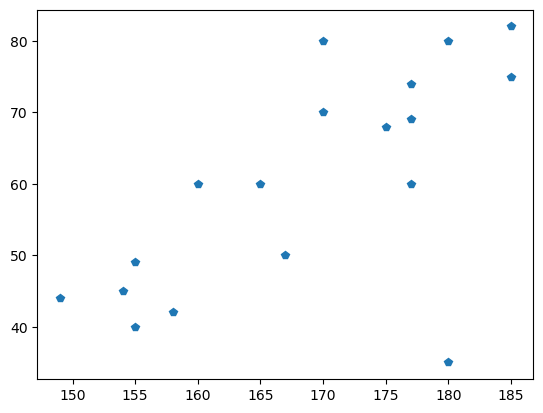

In [74]:
plt.plot(df['height'], df['weight'], "p")

In [87]:
lof = LocalOutlierFactor(n_neighbors=3, contamination=0.05)

In [88]:
df['outlier'] = lof.fit_predict(df)

In [89]:
df

,height,weight,outlier
0,170,80,1
1,165,60,1
2,180,35,-1
3,177,60,1
4,167,50,1
5,155,40,1
6,158,42,1
7,185,82,1
8,170,70,1
9,175,68,1


#### Isolation Forest

In [91]:
from sklearn.ensemble import IsolationForest

In [98]:
iso_forest = IsolationForest(contamination=0.05)

In [99]:
df['outlier'] = iso_forest.fit_predict(df)

In [100]:
df

,height,weight,outlier
0,170,80,1
1,165,60,1
2,180,35,-1
3,177,60,1
4,167,50,1
5,155,40,1
6,158,42,1
7,185,82,1
8,170,70,1
9,175,68,1
